In [18]:
import pandas as pd
from molar import ClientConfig, Client
import rdkit
import rdkit.Chem as chem
import rdkit.Chem.AllChem as allchem

In [10]:
# That's how you connect to the database

cfg = ClientConfig(
    server_url="https://molar.cs.toronto.edu/",
    email="riley.hickman13@gmail.com", 
    password="az1$jH5v", 
    database_name="madness_laser_test"
)
client = Client(cfg)

In [11]:
# This method verifies if you are logged in and what rights you have on the database
client.test_token()

{'email': 'riley.hickman13@gmail.com',
 'is_superuser': False,
 'is_active': True,
 'full_name': 'rileyhickman',
 'created_on': '2022-01-18T19:16:33.241173',
 'user_id': 3}

In [12]:
# Here is an example of a simple query, by defaults only a couple of entries from the database are loaded.
# You can use skip and limit to "scroll" through the database.
df = client.query_database("molecule", limit=500)
df

,molecule_id,created_on,updated_on,hid,smiles,commercially_available,CAS,molecule_type_id
0,6bf2b5a1-c157-4b5a-8a80-bf0b44704273,2022-01-18T12:59:55.557052,2022-01-18T12:59:55.557052,A001,CC1(C)OB(c2ccc(-n3c4ccccc4c4ccccc43)cc2)OC1(C)C,True,785051-54-9,2d012b56-8260-4f9e-8ede-2c8546baf21c
1,b2272f91-8f3d-41a5-87d4-8c473af1da0e,2022-01-18T13:00:03.958016,2022-01-18T13:00:03.958016,A002,CC1(C)OB(c2ccc(N(c3ccccc3)c3ccccc3)cc2)OC1(C)C,True,267221-88-5,2d012b56-8260-4f9e-8ede-2c8546baf21c
2,64ee9f15-7a47-4297-9e10-abc3c434c4e9,2022-01-18T13:00:12.229953,2022-01-18T13:00:12.229953,A003,COc1ccc(N(c2ccc(OC)cc2)c2ccc(B3OC(C)(C)C(C)(C)...,True,875667-84-8,2d012b56-8260-4f9e-8ede-2c8546baf21c
3,c669230e-aeb4-47db-8948-cadbdea4f198,2022-01-18T13:00:20.943680,2022-01-18T13:00:20.943680,A004,CC(C)(C)OC(=O)N(c1ccccc1)c1ccc(B2OC(C)(C)C(C)(...,True,1218791-29-7,2d012b56-8260-4f9e-8ede-2c8546baf21c
4,a8c81cfc-70df-4779-80d8-057b62224b10,2022-01-18T13:00:29.280195,2022-01-18T13:00:29.280195,A005,OB(O)c1ccc(N(c2ccccc2)c2ccc(-c3ccccc3)cc2)cc1,True,1084334-86-0,2d012b56-8260-4f9e-8ede-2c8546baf21c
5,f607a1d6-e065-42da-8fbe-39be80f5d9c8,2022-01-18T13:00:37.558186,2022-01-18T13:00:37.558186,A006,OB(O)c1ccc2c3ccccc3n(-c3ccc(-c4ccccc4)cc3)c2c1,True,1028648-22-7,2d012b56-8260-4f9e-8ede-2c8546baf21c
6,f3209e2a-1cbf-461d-945b-768fa8238f71,2022-01-18T13:00:45.807368,2022-01-18T13:00:45.807368,A007,OB(O)c1ccc2c(c1)c1cc(-c3ccccc3)ccc1n2-c1ccccc1,True,1133058-06-6,2d012b56-8260-4f9e-8ede-2c8546baf21c
7,c6b85389-1f54-4323-9abd-1c1685b29d94,2022-01-18T13:01:09.176952,2022-01-18T13:01:09.176952,A008,CC1(C)OB(c2ccc3c(c2)c2ccccc2n3-c2ccccc2)OC1(C)C,True,1126522-69-7,2d012b56-8260-4f9e-8ede-2c8546baf21c
8,ece76d8c-3284-431a-aa10-38fd47213859,2022-01-18T13:01:33.211641,2022-01-18T13:01:33.211641,A009,OB(O)c1cccc(N(c2ccccc2)c2ccccc2)c1,True,943899-12-5,2d012b56-8260-4f9e-8ede-2c8546baf21c
9,d578c1ee-cabe-4a68-b452-6f747f4a3a64,2022-01-18T13:01:41.261730,2022-01-18T13:01:41.261730,A010,OB(O)c1cccc(-n2c3ccccc3c3ccccc32)c1,True,864377-33-3,2d012b56-8260-4f9e-8ede-2c8546baf21c


In [13]:
# GET A DATAFRAME OF ALL THE FRAGMENTS
frags = client.query_database(
    ["molecule"], 
    joins=[
        {
            "type": "molecule_type",
            "on": {
                "column1": "molecule.molecule_type_id",
                "column2": "molecule_type.molecule_type_id"
            }
        },
    ],
    filters={
        "type": "molecule_type.name",
        "op": "!=",
        "value": "abc_molecule"
    },
    limit=500, 
    offset=None,
)


#frags.to_csv('fragments.csv', index=False)
frags.head()

,molecule_id,created_on,updated_on,hid,smiles,commercially_available,CAS,molecule_type_id
0,6bf2b5a1-c157-4b5a-8a80-bf0b44704273,2022-01-18T12:59:55.557052,2022-01-18T12:59:55.557052,A001,CC1(C)OB(c2ccc(-n3c4ccccc4c4ccccc43)cc2)OC1(C)C,True,785051-54-9,2d012b56-8260-4f9e-8ede-2c8546baf21c
1,b2272f91-8f3d-41a5-87d4-8c473af1da0e,2022-01-18T13:00:03.958016,2022-01-18T13:00:03.958016,A002,CC1(C)OB(c2ccc(N(c3ccccc3)c3ccccc3)cc2)OC1(C)C,True,267221-88-5,2d012b56-8260-4f9e-8ede-2c8546baf21c
2,64ee9f15-7a47-4297-9e10-abc3c434c4e9,2022-01-18T13:00:12.229953,2022-01-18T13:00:12.229953,A003,COc1ccc(N(c2ccc(OC)cc2)c2ccc(B3OC(C)(C)C(C)(C)...,True,875667-84-8,2d012b56-8260-4f9e-8ede-2c8546baf21c
3,c669230e-aeb4-47db-8948-cadbdea4f198,2022-01-18T13:00:20.943680,2022-01-18T13:00:20.943680,A004,CC(C)(C)OC(=O)N(c1ccccc1)c1ccc(B2OC(C)(C)C(C)(...,True,1218791-29-7,2d012b56-8260-4f9e-8ede-2c8546baf21c
4,a8c81cfc-70df-4779-80d8-057b62224b10,2022-01-18T13:00:29.280195,2022-01-18T13:00:29.280195,A005,OB(O)c1ccc(N(c2ccccc2)c2ccc(-c3ccccc3)cc2)cc1,True,1084334-86-0,2d012b56-8260-4f9e-8ede-2c8546baf21c


In [14]:
# GET THE MACHINES
client.query_database(
        ['machine.name', 'lab.name', 'machine.machine_id', 'machine.lab_id'],
        joins=[
        {
            "type": "lab",
            "on": {
                "column1": "machine.lab_id",
                "column2": "lab.lab_id"
            }
        },
    ],
)

,machine.name,lab.name,machine.machine_id,machine.lab_id
0,The Machine,Toronto,7180398a-2fc8-4a95-ba51-6e5fb5c6d8a7,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41
1,ChemSpeed,Toronto,f158c26e-a94e-4994-9a95-de324aa1da23,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41
2,The Machine,Illinois,5600f641-b180-41b1-8043-921e66107744,b65835e3-b908-45c6-9995-ec98d0caafe7
3,Chemputer,Glasgow,9db0b589-ae14-44bb-911f-457b0cd3b0d7,6678a008-deb4-4608-9cb2-d32981156538


In [15]:
# GET THE SYNTHESIS

client.query_database(
    [
      'machine',
      'lab',
      'synthesis',
      'molecule',
      'molecule_molecule',
      'molecule.optical_properties',
    ],
    joins = [
      {
        'type': 'molecule',
        'on': {
          'column1': 'molecule.molecule_id',
          'column2': 'synthesis.molecule_id',
        },
      },
      {
        'type': 'molecule_molecule',
        'on': {
          'column1': 'molecule_molecule.molecule_id',
          'column2': 'molecule.molecule_id',
        },
      },
      {
        'type': 'machine',
        'on': {
          'column1': 'machine.machine_id',
          'column2': 'synthesis.machine_id',
        },
      },
      {
        'type': 'lab',
        'on': {
          'column1': 'lab.lab_id',
          'column2': 'synthesis.lab_id',
        },
      },
    ],
)

,machine.machine_id,machine.created_on,machine.updated_on,machine.name,machine.lab_id,lab.lab_id,lab.created_on,lab.updated_on,lab.name,synthesis.synthesis_id,...,molecule_molecule.molecule_molecule_id,molecule_molecule.created_on,molecule_molecule.updated_on,molecule_molecule.fragment_a,molecule_molecule.fragment_b,molecule_molecule.fragment_c,molecule_molecule.molecule_id,molecule.optical_properties,molecule.CAS,molecule.commercially_available
0,f158c26e-a94e-4994-9a95-de324aa1da23,2022-01-18T12:59:46.312079,2022-01-18T12:59:46.312079,ChemSpeed,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,2022-01-18T12:59:44.418607,2022-01-18T12:59:44.418607,Toronto,fac38c0a-efe9-4655-a4de-a1be52e8695b,...,288904db-93ed-4cd9-a408-20fd562beca6,2022-02-01T22:33:36.442040,2022-02-01T22:33:36.442040,c48d4657-acde-42f1-86ed-ad85bf0f3b5f,5e02fe87-04eb-4d8e-b2d4-78f2ae025546,5b92973e-a494-429f-a7a6-ae45a421bcfb,db38dc00-a9b3-4c65-9632-2f17ff16568d,None,None,None
1,f158c26e-a94e-4994-9a95-de324aa1da23,2022-01-18T12:59:46.312079,2022-01-18T12:59:46.312079,ChemSpeed,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,2022-01-18T12:59:44.418607,2022-01-18T12:59:44.418607,Toronto,292f21b5-1953-4762-94cb-4722f8c720bc,...,1661a343-a837-4438-986b-e026a25755f3,2022-02-02T16:53:52.467010,2022-02-02T16:53:52.467010,faa4de17-7959-4bc4-a071-de1fda1b8a05,80ae3faf-ebe1-4306-ab0b-7546691d09ab,e10ae2cd-e8ad-499f-a9cb-6a0ca1b92a1c,5acc0682-2fd8-4934-9e58-881bd5b038ec,None,None,None
2,f158c26e-a94e-4994-9a95-de324aa1da23,2022-01-18T12:59:46.312079,2022-01-18T12:59:46.312079,ChemSpeed,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,2022-01-18T12:59:44.418607,2022-01-18T12:59:44.418607,Toronto,230b32ce-acd4-46a8-859d-d0b71e15f039,...,41bbfc39-7356-473f-91b5-bb0bc7a88af8,2022-02-02T17:01:39.479074,2022-02-02T17:01:39.479074,faa4de17-7959-4bc4-a071-de1fda1b8a05,80ae3faf-ebe1-4306-ab0b-7546691d09ab,e10ae2cd-e8ad-499f-a9cb-6a0ca1b92a1c,0b0b9fdf-df94-4316-ae89-5628601d6dcc,None,None,None
3,f158c26e-a94e-4994-9a95-de324aa1da23,2022-01-18T12:59:46.312079,2022-01-18T12:59:46.312079,ChemSpeed,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,2022-01-18T12:59:44.418607,2022-01-18T12:59:44.418607,Toronto,919e10b2-261e-4604-b494-20e560ab517b,...,216eade7-7cd0-4bd6-b16b-9e8226162857,2022-02-02T17:13:39.764532,2022-02-02T17:13:39.764532,faa4de17-7959-4bc4-a071-de1fda1b8a05,80ae3faf-ebe1-4306-ab0b-7546691d09ab,e10ae2cd-e8ad-499f-a9cb-6a0ca1b92a1c,97e4b1fb-a1c1-40b9-a4dc-c5715bba40e6,None,None,None
4,f158c26e-a94e-4994-9a95-de324aa1da23,2022-01-18T12:59:46.312079,2022-01-18T12:59:46.312079,ChemSpeed,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,2022-01-18T12:59:44.418607,2022-01-18T12:59:44.418607,Toronto,22ec7d60-ba7d-4147-9a04-df564714f1f8,...,73ab3618-0c19-49bf-96de-4fb32e1d0577,2022-02-02T17:14:26.419078,2022-02-02T17:14:26.419078,faa4de17-7959-4bc4-a071-de1fda1b8a05,80ae3faf-ebe1-4306-ab0b-7546691d09ab,e10ae2cd-e8ad-499f-a9cb-6a0ca1b92a1c,b3e77fd2-683b-450a-913c-97998dcff2e0,None,None,None
5,f158c26e-a94e-4994-9a95-de324aa1da23,2022-01-18T12:59:46.312079,2022-01-18T12:59:46.312079,ChemSpeed,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,2022-01-18T12:59:44.418607,2022-01-18T12:59:44.418607,Toronto,70d5265a-76e5-41ce-9a5d-0bd7b4cec93f,...,1633492d-be3a-48ae-bf42-09a036a972c8,2022-02-02T17:50:00.596877,2022-02-02T17:50:00.596877,faa4de17-7959-4bc4-a071-de1fda1b8a05,80ae3faf-ebe1-4306-ab0b-7546691d09ab,e10ae2cd-e8ad-499f-a9cb-6a0ca1b92a1c,29d07431-c3fd-4538-a2a1-2f7362e76068,None,HELLO A NEW CAS,None
6,f158c26e-a94e-4994-9a95-de324aa1da23,2022-01-18T12:59:46.312079,2022-01-18T12:59:46.312079,ChemSpeed,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,2022-01-18T12:59:44.418607,2022-01-18T12:59:44.418607,Toronto,c5b9fcb1-a1f3-43dd-84e0-9dbf34cca2ee,...,36b60134-1da0-4991-b6b2-b436cbfd385e,2022-02-02T17:57:1

In [24]:
# load in the fragments
a_frags = pd.read_csv('../descriptor_computation/a_frags.csv') # already has smiles_w_sub column
b_frags = pd.read_csv('../descriptor_computation/b_frags.csv')
c_frags = pd.read_csv('../descriptor_computation/c_frags.csv')

In [25]:
# a_frags = frags[frags.hid.str.startswith('A')] 
# b_frags = frags[frags.hid.str.startswith('B')]
# c_frags = frags[frags.hid.str.startswith('C')]

# a_frags.shape, b_frags.shape, c_frags.shape, a_frags.shape[0]*b_frags.shape[0]*c_frags.shape[0]

In [26]:
# a_frags.to_csv('a_frags.csv', index=False)
# b_frags.to_csv('b_frags.csv', index=False)
# c_frags.to_csv('c_frags.csv', index=False)

In [35]:
def replace_blocks(mol):
    
    curr_molwt = chem.rdMolDescriptors.CalcExactMolWt(mol)
    
    repl_halide = chem.MolFromSmiles('C=C')
    repl_boron = chem.MolFromSmiles('C=C(F)F')

    patt_halide = chem.MolFromSmarts('[Br,I]')
    patt_boron  = chem.MolFromSmarts('[B]-1-[#8]-[#6](-[#6](-[#8]-1)(-[#6])-[#6])(-[#6])-[#6]')
    patt_boron_2 = chem.MolFromSmarts('[B](-[#8])-[#8]')
    patt_mida   = chem.MolFromSmarts('[B-]-1-2-[#7+](-[#6])(-[#6]-[#6](-[#8]-1)=[#8])-[#6]-[#6](-[#8]-2)=[#8]')

    # do the halide substitution and ONE of the others
    rms = chem.ReplaceSubstructs(mol, patt_halide, repl_halide, replaceAll=True)
    newMol = chem.RemoveHs(rms[0])
        
#     rms = chem.ReplaceSubstructs(newMol, patt_boron, repl_boron, replaceAll=True)
#     newMol = chem.RemoveHs(rms[0])
#     rms = chem.ReplaceSubstructs(newMol, patt_boron_2, repl_boron, replaceAll=True)
#     newMol = chem.RemoveHs(rms[0])
    rms = chem.ReplaceSubstructs(newMol, patt_mida, repl_boron, replaceAll=True)
    newMol = chem.RemoveHs(rms[0])
    
    return newMol

In [37]:

b_smiles = b_frags['smiles'].tolist()
b_mols   = [chem.MolFromSmiles(s) for s in b_smiles]
c_smiles = c_frags['smiles'].tolist()
c_mols   = [chem.MolFromSmiles(s) for s in c_smiles]

In [38]:
new_b_mols = [replace_blocks(m) for m in b_mols]
new_c_mols = [replace_blocks(m) for m in c_mols]

In [39]:
new_b_smiles = [chem.MolToCXSmiles(m) for m in new_b_mols]
new_c_smiles = [chem.MolToCXSmiles(m) for m in new_c_mols]

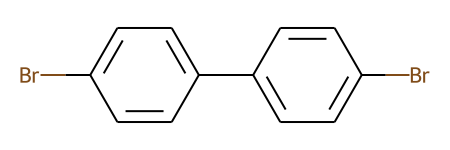

In [57]:
c_mols[0]

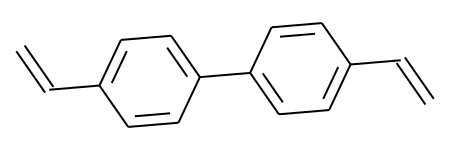

In [58]:
new_c_mols[0]

In [59]:
# replace columns 
b_frags['smiles_w_sub'] = new_b_smiles
c_frags['smiles_w_sub'] = new_c_smiles

In [64]:
b_cols = b_frags.columns
c_cols = c_frags.columns

cols = ['molecule_id', 'created_on', 'updated_on', 'hid', 'smiles',
       'smiles_wo_block', 'smiles_w_sub', 'commercially_available', 'CAS', 'molecule_type_id']



In [65]:
b_frags = b_frags[cols]
c_frags = c_frags[cols]

In [67]:
b_frags.to_csv('b_frags.csv', index=False)
c_frags.to_csv('c_frags.csv', index=False)

In [53]:
new_b_smiles

['C=Cc1ccc(C=CC=C(F)F)cc1',
 'C=Cc1ccsc1C=C(F)F',
 'C=CC=CC=C(F)F',
 'C=Cc1ncccc1C=C(F)F',
 'C=Cc1cncc(C=C(F)F)c1',
 'C=Cc1ccoc1C=C(F)F',
 'C=Cc1cnn(C)c1C=C(F)F',
 'C=Cc1ccccc1C=C(F)F',
 'C=Cc1cccc(C=C(F)F)c1',
 'C=Cc1cccc(C=C(F)F)c1F',
 'C=Cc1cc(C=C(F)F)cc(C(F)(F)F)c1',
 'C=Cc1cc(F)cc(C=C(F)F)c1',
 'C=Cc1ccc(C#N)c(C=C(F)F)c1',
 'C=Cc1cc(C=C(F)F)cc(OC)c1',
 'C=Cc1c(C=C(F)F)sc2ccccc12',
 'C=Cc1cc(Cl)cc(C=C(F)F)c1',
 'C=Cc1ccc(-c2ccc(C=C(F)F)s2)s1',
 'C=Cc1ccc(C=C(F)F)cn1',
 'C=Cc1ccc(C=C(F)F)nc1',
 'C=Cc1cccc(F)c1C=C(F)F',
 'C=Cc1ccc(C=C(F)F)cc1',
 'C=Cc1ccc(F)c(C=C(F)F)c1',
 'C=Cc1ccccc1-c1ccccc1C=C(F)F',
 'C=Cc1ccc2oc(C=C(F)F)cc2c1',
 'C=Cc1ccc(C=C(F)F)s1',
 'C=Cc1ncccc1C=C(F)F',
 'C=Cc1cccc(C=CC=C(F)F)c1',
 'C=Cc1cc(C=C(F)F)on1',
 'C=Cc1cnccc1C=C(F)F',
 'C=CC=CC=C(F)F']

In [54]:
new_c_smiles

['C=Cc1ccc(-c2ccc(C=C)cc2)cc1',
 'C=Cc1ccc(C=C)cc1',
 'C=Cc1cc(C)c(C=C)cc1C',
 'C=Cc1c(F)c(F)c(-c2c(F)c(F)c(C=C)c(F)c2F)c(F)c1F',
 'C=Cc1ccc2c(c1)C(C)(C)c1cc(C=C)ccc1-2',
 'C=Cc1ccc2c(c1)C(=O)c1cc(C=C)ccc1-2',
 'C=Cc1ccc2c(c1)[nH]c1cc(C=C)ccc12',
 'C=Cc1c2ccccc2c(C=C)c2ccccc12',
 'C=Cc1c2ccccc2c(-c2c3ccccc3c(C=C)c3ccccc23)c2ccccc12',
 'C=Cc1ccc2cc(C=C)ccc2c1',
 'C=Cc1cc2sc(C=C)cc2s1',
 'C=Cc1ccc(C=C)c2nsnc12',
 'C=Cc1cnc(C=C)c2nsnc12',
 'C=Cc1c(F)c(F)c(F)c(C=C)c1F',
 'C=Cc1ccc(-c2ccc(C=C)cc2N)c(N)c1',
 'C=Cc1ccc(-c2ccc(-c3ccc(C=C)cc3)cc2)cc1',
 'C=Cc1ccc(-c2cc(C)c(-c3ccc(C=C)cc3)cc2C)cc1',
 'C=Cc1ccc(C=C)c(F)c1',
 'C=Cc1c(F)c(F)c(C=C)c(F)c1F',
 'C=Cc1cc(OC)c(C=C)cc1OC',
 'C=Cc1ccc(C=C)c(C(F)(F)F)c1',
 'C=Cc1ccc(C=C)c([N+](=O)[O-])c1',
 'C=Cc1ccc(C=C)c(N)c1',
 'C=Cc1ccc(C=C)c2nccnc12',
 'C=Cc1ccc(C=C)s1',
 'C=Cc1sc(C=C)c([N+](=O)[O-])c1[N+](=O)[O-]',
 'C=Cc1sc(C=C)c2c1OCCO2',
 'C=Cc1cc(F)c(C=C)cc1F',
 'C=Cc1ccc(C=C)c(C)c1',
 'C=Cc1ccc(C=C)c(C(=O)O)c1',
 'C=Cc1ccc(C=C)nn1',
 'C=Cc1cc(C(F

In [243]:
chem.rdMolDescriptors.CalcExactMolWt(test_mol)

431.2267888399999

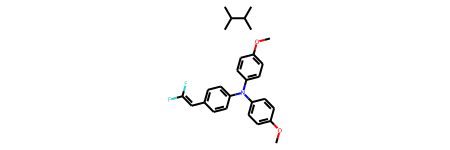

In [239]:
new_mol = replace_blocks(test_mol)
new_mol

In [64]:
edit = chem.RWMol(test_mol)
for atom in edit.GetAtoms():
    if atom.GetAtomicNum() == 35:
        atom.SetAtomicNum(1)
                
chem.SanitizeMol(edit)
mol = chem.RemoveHs(edit)

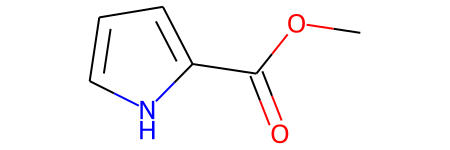

In [65]:
mol

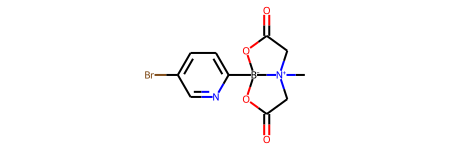

In [67]:
test_b = mols[50]
test_b

In [ ]:
# manually replace A and B frags, automatically e

In [84]:
c_smiles = c_frags['smiles'].tolist()
c_mols = [chem.MolFromSmiles(s) for s in c_smiles]



In [93]:
c_mols_wo_block = []
for mol in c_mols:
    edit= chem.RWMol(mol)
    for atom in edit.GetAtoms():
        if atom.GetAtomicNum() in [35, 53]:
            atom.SetAtomicNum(6)
            
    chem.SanitizeMol(edit)
    mol_wo_block = chem.RemoveHs(edit)
    c_mols_wo_block.append(mol_wo_block)
    

In [95]:
c_smiles_wo_block = [chem.MolToCXSmiles(m) for m in c_mols_wo_block]

In [96]:
c_smiles_wo_block

['Cc1ccc(-c2ccc(C)cc2)cc1',
 'Cc1ccc(C)cc1',
 'Cc1cc(C)c(C)cc1C',
 'Cc1c(F)c(F)c(-c2c(F)c(F)c(C)c(F)c2F)c(F)c1F',
 'Cc1ccc2c(c1)C(C)(C)c1cc(C)ccc1-2',
 'Cc1ccc2c(c1)C(=O)c1cc(C)ccc1-2',
 'Cc1ccc2c(c1)[nH]c1cc(C)ccc12',
 'Cc1c2ccccc2c(C)c2ccccc12',
 'Cc1c2ccccc2c(-c2c3ccccc3c(C)c3ccccc23)c2ccccc12',
 'Cc1ccc2cc(C)ccc2c1',
 'Cc1cc2sc(C)cc2s1',
 'Cc1ccc(C)c2nsnc12',
 'Cc1cnc(C)c2nsnc12',
 'Cc1c(F)c(C)c(F)c(F)c1F',
 'Cc1ccc(-c2ccc(C)cc2N)c(N)c1',
 'Cc1ccc(-c2ccc(-c3ccc(C)cc3)cc2)cc1',
 'Cc1ccc(-c2cc(C)c(-c3ccc(C)cc3)cc2C)cc1',
 'Cc1ccc(C)c(F)c1',
 'Cc1c(F)c(F)c(C)c(F)c1F',
 'COc1cc(C)c(OC)cc1C',
 'Cc1ccc(C)c(C(F)(F)F)c1',
 'Cc1ccc(C)c([N+](=O)[O-])c1',
 'Cc1ccc(C)c(N)c1',
 'Cc1ccc(C)c2nccnc12',
 'Cc1ccc(C)s1',
 'Cc1sc(C)c([N+](=O)[O-])c1[N+](=O)[O-]',
 'Cc1sc(C)c2c1OCCO2',
 'Cc1cc(F)c(C)cc1F',
 'Cc1ccc(C)c(C)c1',
 'Cc1ccc(C)c(C(=O)O)c1',
 'Cc1ccc(C)nn1',
 'Cc1cc(C(F)(F)F)c(C)cn1',
 'Cc1cnc(C)nc1',
 'Cc1ccc2ccc(C)cc2c1',
 'Cc1ccccc1-c1ccccc1C',
 'Cc1cccc(C)c1',
 'Cc1ccsc1-c1sccc1C',
 'Cc1cc

In [97]:
c_frags['smiles_wo_block'] = c_smiles_wo_block

/home/riley/Software/anaconda3/envs/feas/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
c_frags.columns

Index(['molecule_id', 'created_on', 'updated_on', 'hid', 'smiles',
       'commercially_available', 'CAS', 'molecule_type_id', 'smiles_wo_block'],
      dtype='object')

In [106]:
cols = ['molecule_id', 'created_on', 'updated_on', 'hid', 'smiles', 'smiles_wo_block',
       'commercially_available', 'CAS', 'molecule_type_id']

c_frags = c_frags[cols]
c_frags.to_csv('c_frags.csv', index=False)

In [105]:
# Another rather simple query, this time on the lab table
client.query_database("lab")

,lab_id,created_on,updated_on,name
0,08cc75ca-8d1e-4ead-9b56-ad1b6ba83a41,2022-01-18T12:59:44.418607,2022-01-18T12:59:44.418607,Toronto
1,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois
2,6678a008-deb4-4608-9cb2-d32981156538,2022-01-18T12:59:48.810040,2022-01-18T12:59:48.810040,Glasgow
3,4d3c35cc-bf60-4bfe-8f59-9e7f50b04385,2022-01-18T12:59:50.578546,2022-01-18T12:59:50.578546,Vancouver


In [36]:
# And now a fancy ass query!
# This binds lab, lab_molecule and molecule together and then filters only molecule available in Illinois!
# The joins argument tells the database how to connect the tables together.
client.query_database(
    ["lab", "lab_molecule", "molecule"], 
    joins=[
        {
            "type": "lab_molecule",
            "on": {
                "column1": "lab.lab_id",
                "column2": "lab_molecule.lab_id"
            }
        },
        {
            "type": "molecule",
            "on": {
                "column1": "lab_molecule.molecule_id",
                "column2": "molecule.molecule_id"
            }
        
        }
    ],
    filters={
        "type": "lab.name",
        "op": "==",
        "value": "Illinois"
    }
)

,lab.lab_id,lab.created_on,lab.updated_on,lab.name,lab_molecule.lab_molecule_id,lab_molecule.created_on,lab_molecule.updated_on,lab_molecule.available,lab_molecule.lab_id,lab_molecule.molecule_id,molecule.molecule_id,molecule.created_on,molecule.updated_on,molecule.hid,molecule.smiles,molecule.commercially_available,molecule.CAS,molecule.molecule_type_id
0,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois,03ef606a-d66f-4e20-b5ef-c93a759884c3,2022-01-18T13:00:02.257587,2022-01-18T13:00:02.257587,False,b65835e3-b908-45c6-9995-ec98d0caafe7,6bf2b5a1-c157-4b5a-8a80-bf0b44704273,6bf2b5a1-c157-4b5a-8a80-bf0b44704273,2022-01-18T12:59:55.557052,2022-01-18T12:59:55.557052,A001,CC1(C)OB(c2ccc(-n3c4ccccc4c4ccccc43)cc2)OC1(C)C,True,785051-54-9,2d012b56-8260-4f9e-8ede-2c8546baf21c
1,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois,73c59860-7c66-4458-9cd1-92e78f2bd7f8,2022-01-18T13:00:10.606599,2022-01-18T13:00:10.606599,False,b65835e3-b908-45c6-9995-ec98d0caafe7,b2272f91-8f3d-41a5-87d4-8c473af1da0e,b2272f91-8f3d-41a5-87d4-8c473af1da0e,2022-01-18T13:00:03.958016,2022-01-18T13:00:03.958016,A002,CC1(C)OB(c2ccc(N(c3ccccc3)c3ccccc3)cc2)OC1(C)C,True,267221-88-5,2d012b56-8260-4f9e-8ede-2c8546baf21c
2,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois,a76fa588-bae8-4394-b395-664a7643a075,2022-01-18T13:00:19.261068,2022-01-18T13:00:19.261068,False,b65835e3-b908-45c6-9995-ec98d0caafe7,64ee9f15-7a47-4297-9e10-abc3c434c4e9,64ee9f15-7a47-4297-9e10-abc3c434c4e9,2022-01-18T13:00:12.229953,2022-01-18T13:00:12.229953,A003,COc1ccc(N(c2ccc(OC)cc2)c2ccc(B3OC(C)(C)C(C)(C)...,True,875667-84-8,2d012b56-8260-4f9e-8ede-2c8546baf21c
3,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois,bbd8ba58-1ae8-4398-b4c6-9b5107aa6a8c,2022-01-18T13:00:27.653412,2022-01-18T13:00:27.653412,False,b65835e3-b908-45c6-9995-ec98d0caafe7,c669230e-aeb4-47db-8948-cadbdea4f198,c669230e-aeb4-47db-8948-cadbdea4f198,2022-01-18T13:00:20.943680,2022-01-18T13:00:20.943680,A004,CC(C)(C)OC(=O)N(c1ccccc1)c1ccc(B2OC(C)(C)C(C)(...,True,1218791-29-7,2d012b56-8260-4f9e-8ede-2c8546baf21c
4,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois,96f3ea27-8916-4caa-b5cd-5906e0f9c871,2022-01-18T13:00:35.830463,2022-01-18T13:00:35.830463,False,b65835e3-b908-45c6-9995-ec98d0caafe7,a8c81cfc-70df-4779-80d8-057b62224b10,a8c81cfc-70df-4779-80d8-057b62224b10,2022-01-18T13:00:29.280195,2022-01-18T13:00:29.280195,A005,OB(O)c1ccc(N(c2ccccc2)c2ccc(-c3ccccc3)cc2)cc1,True,1084334-86-0,2d012b56-8260-4f9e-8ede-2c8546baf21c
5,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois,54128f46-a985-41e5-9721-3a6e410836f6,2022-01-18T13:00:44.156287,2022-01-18T13:00:44.156287,False,b65835e3-b908-45c6-9995-ec98d0caafe7,f607a1d6-e065-42da-8fbe-39be80f5d9c8,f607a1d6-e065-42da-8fbe-39be80f5d9c8,2022-01-18T13:00:37.558186,2022-01-18T13:00:37.558186,A006,OB(O)c1ccc2c3ccccc3n(-c3ccc(-c4ccccc4)cc3)c2c1,True,1028648-22-7,2d012b56-8260-4f9e-8ede-2c8546baf21c
6,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois,949a2dda-5b5c-43b7-b5a4-55abc0b3aff7,2022-01-18T13:01:07.576948,2022-01-18T13:01:07.576948,False,b65835e3-b908-45c6-9995-ec98d0caafe7,f3209e2a-1cbf-461d-945b-768fa8238f71,f3209e2a-1cbf-461d-945b-768fa8238f71,2022-01-18T13:00:45.807368,2022-01-18T13:00:45.807368,A007,OB(O)c1ccc2c(c1)c1cc(-c3ccccc3)ccc1n2-c1ccccc1,True,1133058-06-6,2d012b56-8260-4f9e-8ede-2c8546baf21c
7,b65835e3-b908-45c6-9995-ec98d0caafe7,2022-01-18T12:59:47.145756,2022-01-18T12:59:47.145756,Illinois,d1dc5be2-d2cb-4cb6-9217-52efb15f2118,2022-01-18T13:01:31.393353,2022-01-18T13:01:31.393353,False,b65835e3-b908-45c6-9995-ec98d0caafe7,c6b85389-1f54-4323-9abd-1c1685b29d94,c6b85389-1f54-4323-9abd-1c1685b29d94,2022-01-18T13:01:09.176952,2022-0

In [7]:
# Creating a new user <- YOU NEED TO DO THIS TO USE THE DATABASE!
# To make it work with the database hosted at cs.toronto.edu,
# you need to replace server_url by "https://molar.cs.toronto.edu"
# I will need to validate your account

newuser_cfg = ClientConfig(
    server_url="https://molar.cs.toronto.edu",
    email="riley.hickman13@gmail.com",
    password="vehicle2$7$!",
    database_name="madness_laser"
)
client = Client(newuser_cfg)
client.register_user(full_name="Riley Hickman")

[17:52:23] INFO     User riley.hickman13@gmail.com has been register. Ask your  ]8;id=987116;file:///home/riley/Software/anaconda3/envs/lasers/lib/python3.7/site-packages/molar/client.py\client.py]8;;\:]8;id=877518;file:///home/riley/Software/anaconda3/envs/lasers/lib/python3.7/site-packages/molar/client.py#107\107]8;;\
                    database admin to activate this account

{'msg': 'User riley.hickman13@gmail.com has been register. Ask your database admin to activate this account'}